## Упражнения по библиотеке Numpy

In [2]:
import numpy as np

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [10]:
array = np.random.randint(0, 11, size=20) #создали массив со знач. от 0 до 10, в объеме 20 элементов
print(array)

mask = (array > 3) & (array < 8) #булев массив (маска) с условием (булевая индексация - помогает манипулировать элементами массива)
array[mask] = array[mask] * -1 # применяем операцию к тем значениям соответствующие True по указанному условию в маске
print(array)

[ 6  0  5  9  1  7  7  6  7 10  5  7  7  2  2  2  7  7 10  1]
[-6  0 -5  9  1 -7 -7 -6 -7 10 -5 -7 -7  2  2  2 -7 -7 10  1]


**2.** Заменить максимальный элемент случайного массива на 0

In [19]:
array = np.random.randint(0, 6, size=10)
print(array)

max_value = np.max(array) # находим максимальное значение в массиве
array[array == max_value] = 0 # Находим все элементы, равные максимальному значению, и заменяем их на 0
print(array)

[4 4 5 0 2 3 5 4 2 0]
[4 4 0 0 2 3 0 4 2 0]


**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [11]:
a = np.array([[2, 10], [4, 8]])
print(a)

# метод 1 - itertools.product
import itertools
print(tuple(itertools.product(*a)))

# метод 2 - meshgrid
print(np.dstack(np.meshgrid(*a)).reshape(4, 2))

[[ 2 10]
 [ 4  8]]
((2, 4), (2, 8), (10, 4), (10, 8))
[[ 2  4]
 [10  4]
 [ 2  8]
 [10  8]]


**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [44]:
A = np.array([[10, 20, 30],
              [20, 30, 40],
              [30, 10, 20],
              [40, 50, 60],
              [50, 60, 70],
              [60, 40, 50],
              [70, 80, 90],
              [80, 90, 100]])

B = np.array([[20, 30],
               [6, 40]])

def contains_all_elements(a, b):
    # содержит ли A все элементы из b, независимо от порядка
    return set(b).issubset(set(a))

def find_matching_rows(A, B):
    result = []
    for i in range(len(A)):
        if contains_all_elements(A[i], B[0]) or contains_all_elements(A[i], B[1]):
            result.append(i)
    return result

result = find_matching_rows(A, B)

print("Индексы строк в A, содержащих элементы из каждой строки B:", result)

# Для проверки выведем сами строки A, удовлетворяющие условию
print("Строки в A, содержащие элементы из каждой строки B:")
print(A[result])

Индексы строк в A, содержащих элементы из каждой строки B: [0, 1, 2]
Строки в A, содержащие элементы из каждой строки B:
[[10 20 30]
 [20 30 40]
 [30 10 20]]


**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [69]:
matrix = np.random.randint(1, 3, size = (10, 3))
print(matrix)

for i in matrix:
    list_1 = []
    if (i[0] == i[1] and i[1] == i[2]):
        list_1.append(i)
    else:
        continue
    print(list_1)

[[2 2 1]
 [1 1 1]
 [2 1 1]
 [1 2 1]
 [1 2 2]
 [2 1 2]
 [1 1 1]
 [2 2 2]
 [1 2 1]
 [2 2 2]]
[array([1, 1, 1])]
[array([1, 1, 1])]
[array([2, 2, 2])]
[array([2, 2, 2])]


**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [61]:
matrix = np.random.randint(1, 3, size = (4, 2))
print(matrix)

x = set()

for i in matrix:
    tuple_i = tuple(i)
    if tuple_i not in x:
        x.add(tuple_i)
print(x)

[[1 2]
 [1 1]
 [1 1]
 [1 2]]
{(1, 1), (1, 2)}


______
______

Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

___

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [4]:
matrix = [[1, 0, 1], [2, 2, 2], [3, 0, 3], [4, 4, 4]]

result = 1
# Python classic
for i in range(3):
    if matrix[i][i] != 0:
        result *= matrix[i][i]
print(result)

#NumPy
diagonal_el = np.diag(matrix) # получение диагональных элементов матрицы
print(np.prod(diagonal_el[diagonal_el != 0])) # prod - вычисление указанных элементов диагонали (по условию)

6
6


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [6]:
#Python Classic
X = [1, 2, 2, 4]
Y = [4, 2, 1, 2]

X.sort()
Y.sort()

print(X == Y) #сравниваем отсортированные списки

#NumPy
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
print(np.array_equal(np.sort(x), (np.sort(y)))) #сортируем массивы и проверяем таким образом на соответствие условию

True
True


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [5]:
#Python Classic
x = [6, 2, 0, 3, 0, 0, 5, 7, 0]
x_num = np.array(x)

result = 0

for i in range(len(x) - 1):
    if x[i] == 0 and (x[i+1] >= result):
        result = x[i+1]

print(result)

#NumPy
ind = np.where(x_num[:-1] == 0)[0] + 1 # находим индексы элементов = 0, далее определяем элементы стоящие после нулей.
result_ = np.max(x_num[ind]) # находим макс элемент из извлеченных

print(result_)

# x[:-1] извлекаем все элементы массива, кроме последнего


5
5


* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [9]:
x = [2, 2, 2, 3, 3, 3, 5]

values = []
counts = []

current_value = None
current_count = 0

for i in x:
    if i != current_value:
        if current_value is not None:
            values.append(current_value)
            counts.append(current_count)
        current_value = i
        current_count = 1
    else:
        current_count += 1

if current_value is not None:
    values.append(current_value)
    counts.append(current_count)
    
print(values)
print(counts)

#NumPy
values, counts = np.unique(x, return_counts=True) #возвращает два массива 1) уник элементы 2) кол-во этих элементов

print(values)
print(counts)

[2, 3, 5]
[3, 3, 1]
[2 3 5]
[3 3 1]


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

In [160]:
# your code

_______
________

* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


In [3]:
import numpy as np

1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

In [5]:
calorie_stats = np.loadtxt("C:/Users/User/Downloads/cereal.csv", delimiter=",")
calorie_stats

array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [6]:
avg = np.mean(calorie_stats) # ср знач массива
CM = 60
print(f'Среднее значение массива: {avg}')
print(avg - CM)

Среднее значение массива: 106.88311688311688
46.883116883116884


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию

In [7]:
calorie_stats_sorted = np.sort(calorie_stats)
print(calorie_stats_sorted)

[ 50.  50.  50.  70.  70.  80.  90.  90.  90.  90.  90.  90.  90. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 130.
 130. 140. 140. 140. 150. 150. 160.]


4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.

In [8]:
median_calories = np.median(calorie_stats)
print(f'Медиана массива: {median_calories}')
print(f'Среднее значение массива: {round(avg, 2)}')

Медиана массива: 110.0
Среднее значение массива: 106.88


5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.

In [9]:
print(np.percentile(calorie_stats_sorted, 3.3))
print(np.percentile(calorie_stats_sorted, 5))
print(np.percentile(calorie_stats_sorted, 10))
print(np.percentile(calorie_stats_sorted, 50))
print(np.percentile(calorie_stats_sorted, 100))

# Процентиль набора данных — значение, которое отсекает первые n процентов значений данных, 
# когда все значения отсортированы от наименьшего к наибольшему. То есть 3.3% данных имеют значение до 60.16

60.16
70.0
90.0
110.0
160.0


6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [13]:
more_calories = np.sum(calorie_stats > 60) / np.size(calorie_stats)
print(more_calories.round(2))

0.96


7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [20]:
calorie_std = np.std(calorie_stats)
calorie_std
# ст. отклонение (19.4) относительное среднего зачения (107) - довольно невелико. 
# Это говорит о том что калорийность хлопьев на рынке не сильно варируется от ср. значения 107.

19.35718533390827

8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

In [21]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

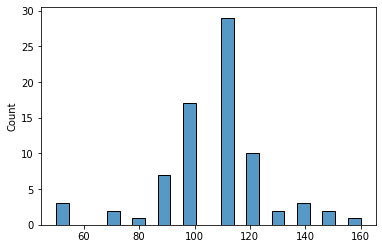

In [24]:
sns.histplot(calorie_stats)

In [ ]:
Колорийность хлопьев CrunchieMunchies меньше чем у 96% аналогов. 
Мы наглядно можем это увидеть на гистограмме распределения, она, кстати, имеет признаки распределения Гаусса.
Все же продукт содержит на 47 калорий меньше от средней порции хлопьев на рынке.
Соотвественно, наши хлопья сильно выделяются на фоне конкурентов в сторону низкоколорийного продукта - ...
... что является очевидным преимуществом которое нам стоит подсветить потенциальным покупателям в маркетинговой кампании.
И при этом, желательно ссылаться на сухие цифры [для убедительности :) ]